In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
df = pd.DataFrame(data=data.data,columns=data.feature_names)
df['target']=data.target

In [4]:
d = df
x = d.drop(['target'],axis=1)
y = d['target']

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
x = pca.fit_transform(x)
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163 0.06602135]


In [7]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)

In [8]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [9]:
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals

In [10]:
algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(x,y,train_size=0.8,random_state=algorithm_globals.random_seed)

In [11]:
pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.


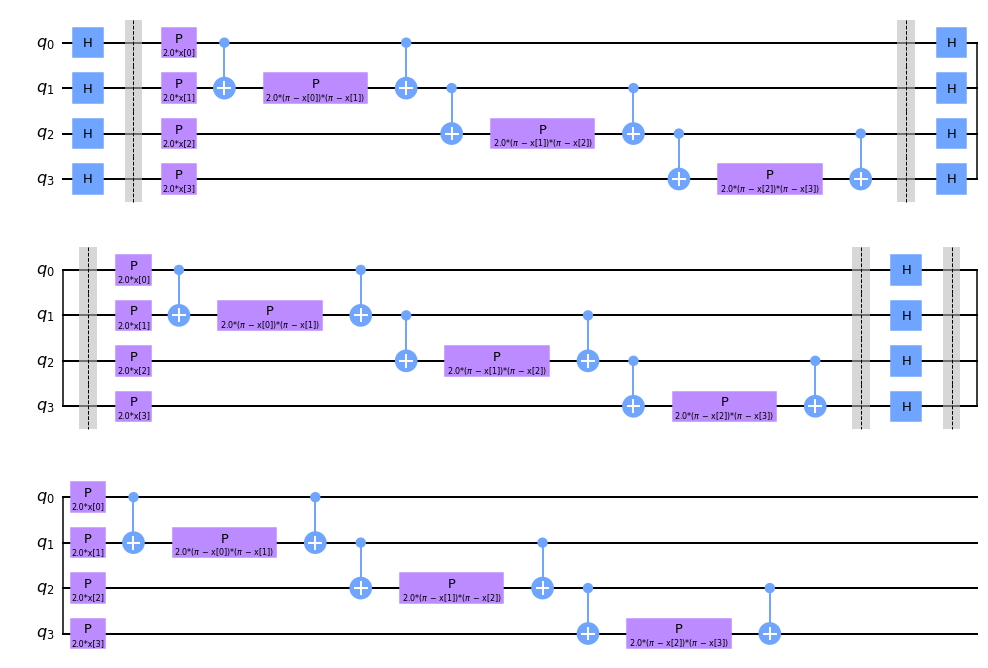

In [12]:
from qiskit.circuit.library import ZZFeatureMap
num_features = train_features.shape[1]
feature_map = ZZFeatureMap(feature_dimension=num_features,reps=3,entanglement='linear',insert_barriers=True)
feature_map.decompose().draw(output='mpl',fold=20,filename='featuremap')

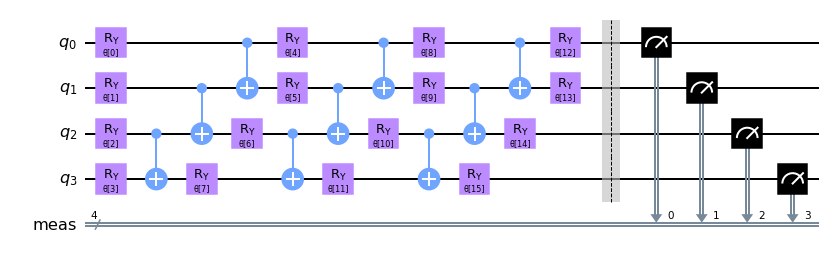

In [13]:
from qiskit.circuit.library import RealAmplitudes
ansatz = RealAmplitudes(num_qubits=num_features,reps=3)
ansatz.measure_all()
ansatz.decompose().draw(output='mpl',fold=20,filename='ansatz')

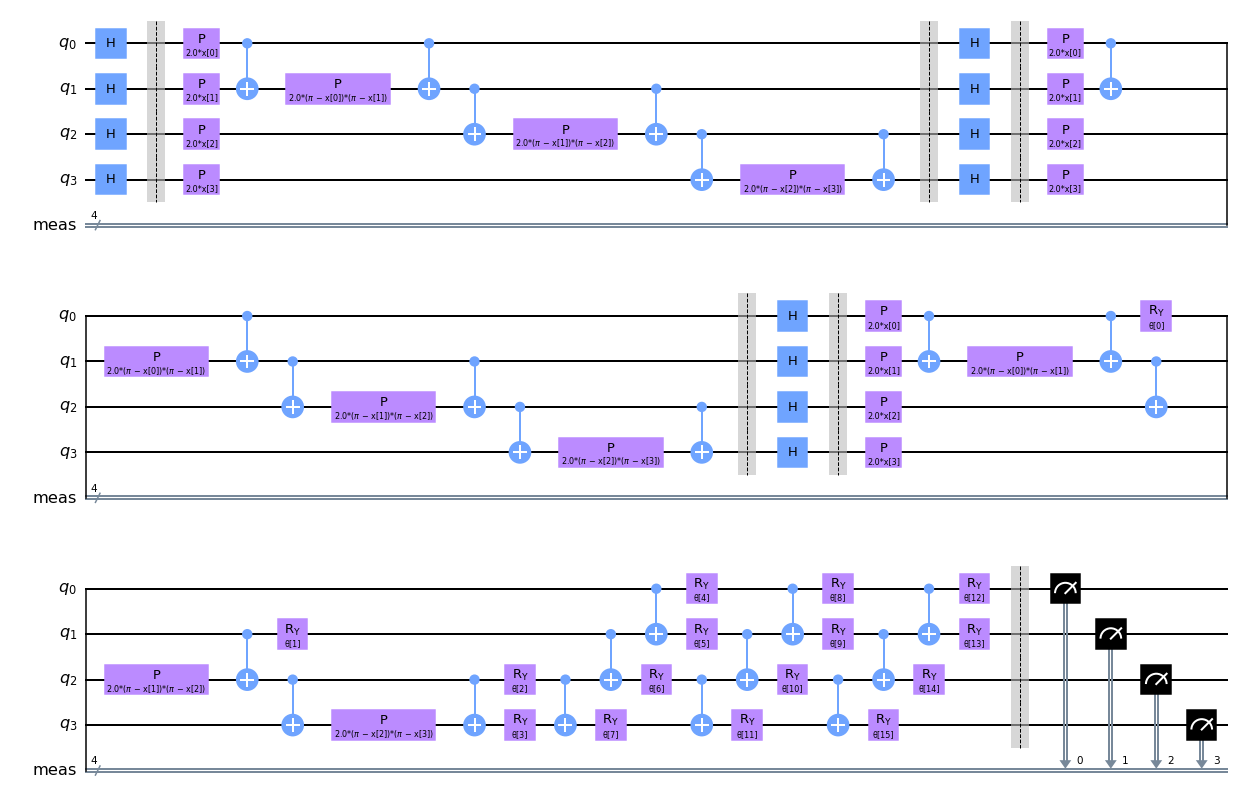

In [14]:
circuit = feature_map.compose(ansatz)
circuit.decompose().draw(output='mpl',filename='overallcircuit.png')

In [15]:
initial_point = np.random.random(ansatz.num_parameters)
initial_point

array([0.98391411, 0.90450328, 0.82406543, 0.88662853, 0.15147258,
       0.48735498, 0.95216507, 0.7181246 , 0.98667755, 0.34114072,
       0.55062778, 0.23843427, 0.17903251, 0.6535487 , 0.50032782,
       0.54438835])

In [16]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
train_labels = pd.DataFrame(train_labels).to_numpy()
test_labels = pd.DataFrame(test_labels).to_numpy()
train_labels_oh=encoder.fit_transform(train_labels.reshape(-1,1)).toarray()
test_labels_oh=encoder.fit_transform(test_labels.reshape(-1,1)).toarray()

In [17]:
pip install qiskit-machine-learning

Note: you may need to restart the kernel to use updated packages.


Execution on quantum simulator

In [30]:
import time
start = time.time()
from qiskit import BasicAer,execute
from qiskit.algorithms.optimizers import SPSA
from qiskit_machine_learning.algorithms.classifiers import VQC
vqc = VQC(feature_map=feature_map,ansatz=ansatz,loss='cross_entropy',optimizer=SPSA(),initial_point=initial_point,quantum_instance=BasicAer.get_backend('qasm_simulator'))
vqc.fit(train_features,train_labels_oh)
print(f'Quantum VQC test accuracy: {vqc.score(test_features,test_labels_oh):.2f}')
end = time.time()
print(end-start)

Quantum VQC test accuracy: 0.81
635.2566819190979
